<Figure size 640x480 with 0 Axes>

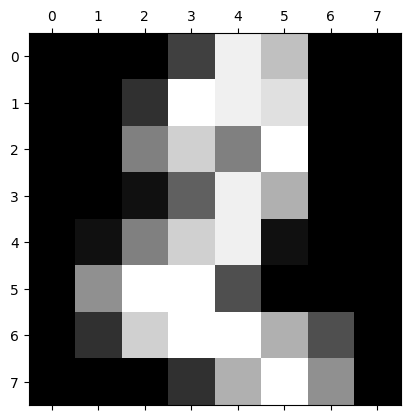

[0 1 2 ... 8 9 8]


In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
plt.gray()
#imprimir la tercera imagen de la colección
plt.matshow(digits.images[2]) 
plt.show()
print(digits.target)

In [3]:
# preproceso: de imágenes a vectores 
n_imagenes = len(digits.images)
data = digits.images.reshape(n_imagenes, -1) # -1 significa colocar los datos en forma de vector



In [4]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

# división entre entrenamiento  y testeo
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.8, shuffle=True)
# crear/definir el clasificador
clf = svm.SVC(gamma=0.001)
# entrenamiento del modelo
clf.fit(X_train, y_train)
# prediccion sobre test
predicted = clf.predict(X_test)

In [5]:
# Evaluación
print(f"Informe de clasificación:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")


Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       137
           1       0.92      0.99      0.96       141
           2       0.99      0.99      0.99       137
           3       0.99      0.94      0.96       156
           4       0.99      0.97      0.98       154
           5       0.98      0.97      0.97       140
           6       0.99      0.98      0.99       142
           7       0.91      0.99      0.95       145
           8       0.93      0.94      0.93       139
           9       0.98      0.90      0.94       147

    accuracy                           0.97      1438
   macro avg       0.97      0.97      0.97      1438
weighted avg       0.97      0.97      0.97      1438




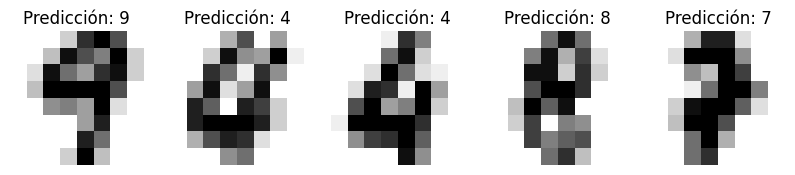

In [6]:
# Visualización
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Predicción: {prediction}')